Number of samples: 20137
Number of classes: 4
Image shape: (224, 224, 3)


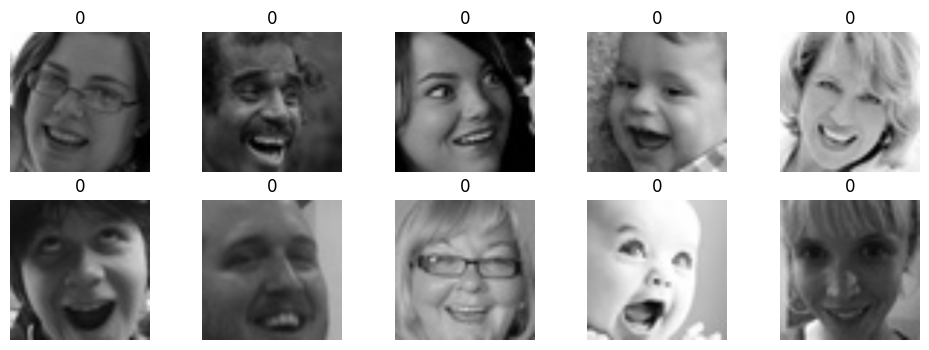

MemoryError: Unable to allocate 22.6 GiB for an array with shape (20137, 224, 224, 3) and data type float64

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import seaborn as sns

# Define the paths to your datasets
happy_dir = 'C:/Users/Dell/Desktop/Project-Emojify/data/train/happy/'
sad_dir = 'C:/Users/Dell/Desktop/Project-Emojify/data/train/sad/'
fear_dir = 'C:/Users/Dell/Desktop/Project-Emojify/data/train/fear/'
angry_dir = 'C:/Users/Dell/Desktop/Project-Emojify/data/train/angry/'

# Function to load and preprocess the image data
def load_and_preprocess_images(data_dir, label):
    images = []
    labels = []
    
    for filename in os.listdir(data_dir):
        if filename.endswith(".jpg"):  # You can adjust the file format as needed
            img_path = os.path.join(data_dir, filename)
            image = cv2.imread(img_path)  # Load the image using OpenCV
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            image = cv2.resize(image, (224, 224))  # Resize to a common size
            images.append(image)
            labels.append(label)
    
    return np.array(images), np.array(labels)

# Load and preprocess each dataset
happy_images, happy_labels = load_and_preprocess_images(happy_dir, label=0)
sad_images, sad_labels = load_and_preprocess_images(sad_dir, label=1)
fear_images, fear_labels = load_and_preprocess_images(fear_dir, label=2)
angry_images, angry_labels = load_and_preprocess_images(angry_dir, label=3)

# Combine all datasets
X = np.vstack((happy_images, sad_images, fear_images, angry_images))
y = np.concatenate((happy_labels, sad_labels, fear_labels, angry_labels))

# Descriptive Analysis
# Calculate some basic statistics
num_samples = X.shape[0]
num_classes = len(np.unique(y))
image_shape = X.shape[1:]

# Print dataset information
print("Number of samples:", num_samples)
print("Number of classes:", num_classes)
print("Image shape:", image_shape)

# Visualize a sample of the data
plt.figure(figsize=(12, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i])
    plt.title(y[i])
    plt.axis('off')
plt.show()

# You can further explore and analyze your dataset as needed

# Preprocessing (e.g., normalization, train-test split)
# You may need to perform other preprocessing steps depending on your specific use case

# Normalize the images (scale pixel values to [0, 1])
# X = X / 255.0

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Save the preprocessed data if needed
# np.save("X_train.npy", X_train)
# np.save("X_test.npy", X_test)
# np.save("y_train.npy", y_train)
# np.save("y_test.npy", y_test)

# Calculate the correlation matrix for the flattened images
X_flattened = X.reshape(X.shape[0], -1)
correlation_matrix = np.corrcoef(X_flattened.T)

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, cmap='coolwarm', xticklabels=False, yticklabels=False)
plt.title("Correlation Matrix")
plt.show()
